In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager


# Set up Splinter
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
html_soup = soup(html, 'html.parser')




[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:00<00:00, 10.5MB/s]


In [3]:
mars_table=pd.read_html(url)
mars_table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
df=mars_table[0]
df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [5]:
df=df.iloc[1:]

In [6]:
df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0
10,123,2012-08-29,23,162,6,-75.0,741.0


In [7]:
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [8]:
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])

C:\Users\qiuzi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
# Q6. How many months exist on Mars?
len(df['month'].unique())

12

In [11]:
# Q7. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
len(df['sol'].unique())

1866

In [12]:
# Q8.What are the coldest and the warmest months on Mars 
#(at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. 
#Plot the results as a bar chart.
temp = df.groupby('month').mean()
temp


,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,740.328767,755.904110,164.965753,-75.301370,745.095890
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


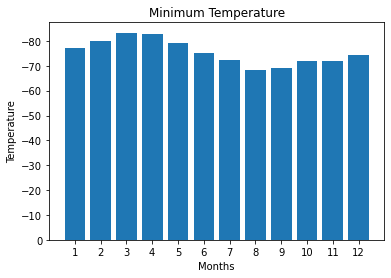

In [14]:

months = np.arange(1,13,1)
x=months
y=temp['min_temp']

plt.bar(x,y)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.title("Minimum Temperature")
plt.gca().invert_yaxis()
plt.show()


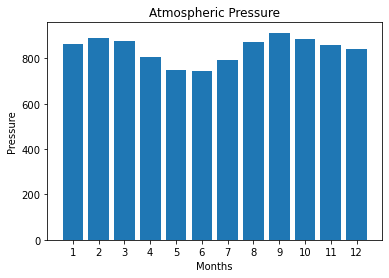

In [16]:
#9.Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months.
#Plot the results as a bar chart.
months = np.arange(1,13,1)
x=months
y=temp['pressure']

plt.bar(x,y)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Pressure")
plt.title("Atmospheric Pressure")
plt.show()

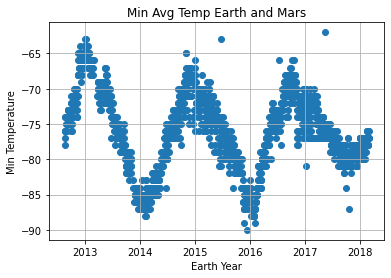

In [21]:
#10.Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.
days= df.groupby('terrestrial_date')
plt.scatter(days["terrestrial_date"].mean(),days["min_temp"].mean())
plt.title("Min Avg Temp Earth and Mars")
plt.ylabel("Min Temperature")
plt.xlabel("Earth Year")
plt.grid()
plt.show()

In [22]:
df.to_csv("Mars_DataFrame")